In [6]:
import pandas as pd
import odfpy
df = pd.read_excel("/Users/chawkibhd/Downloads/projetDM/BMGs-2024.ods", engine="odf")

print(df.head())

ModuleNotFoundError: No module named 'odfpy'

In [8]:
xls = pd.ExcelFile("/Users/chawkibhd/Downloads/projetDM/data/BMGs-2024.ods", engine="odf")
print(xls.sheet_names) 


['Sheet1', 'Dataset']


In [9]:
df = pd.read_excel(xls, sheet_name="Sheet1", engine="odf")
print(df.head())

           Alloys (compostion)  Tg(K)  Tx(K)  Tl(K)  Dmax (mm)
0  Ag30.8 Ca30.8 Mg23.1 Cu15.4  413.0  432.0  803.0        2.5
1         Ag38.4 Mg30.8 Ca30.8  394.0  426.0  805.0        0.5
2     Ag38.5 Ca30.8 Mg23 Cu7.7  384.0  416.0  854.0        2.0
3   Ag38.5 Mg38.5 Ca15.4 Cu7.7  405.0  436.0  842.0        0.5
4         Ag46.2 Ca30.7 Mg23.1  399.0  426.0  765.0        0.7


In [10]:
df.head()

,Alloys (compostion),Tg(K),Tx(K),Tl(K),Dmax (mm)
0,Ag30.8 Ca30.8 Mg23.1 Cu15.4,413.0,432.0,803.0,2.5
1,Ag38.4 Mg30.8 Ca30.8,394.0,426.0,805.0,0.5
2,Ag38.5 Ca30.8 Mg23 Cu7.7,384.0,416.0,854.0,2.0
3,Ag38.5 Mg38.5 Ca15.4 Cu7.7,405.0,436.0,842.0,0.5
4,Ag46.2 Ca30.7 Mg23.1,399.0,426.0,765.0,0.7


In [11]:
def process_row(row):
    for i in len(row["Alloys (compostion)"]):
        word += row["Alloys (compostion)"][i]
        
            if isinstance(i, (int, float)):
                for j in len(row["Alloys (compostion)"]):
                    number += row["Alloys (compostion)"][j]
                    if j == " ":
                        break;
                
            if (isinstance(i, (int, float)):
                if word == "Ag":
                    return number
                else:
                    return 0

IndentationError: unexpected indent (964462527.py, line 5)

In [12]:
# We're going to create 4 columns 
# We're going to read every row and check if one the created column exsist 
# If it exsist we place the value of that row in the specific column

df["Ag"] = df.apply(process_row, axis=1)
df["Ca"]
df["Mg"]
df["Cu"]

NameError: name 'process_row' is not defined

In [13]:
import re

def parse_alloys(row):
    matches = re.findall(r'([A-Za-z]+)([0-9.]+)', row)
    result = {}
    for element, value in matches:
        result[element] = float(value)
    return result
row = "Ag38.4 Mg30.8 Ca30.8"
print(parse_alloys(row))

{'Ag': 38.4, 'Mg': 30.8, 'Ca': 30.8}


In [14]:
'''
import numpy as np

def safe_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

for element in all_elements:
    df[element] = parsed.apply(lambda x: safe_float(x[element]) if element in x else np.nan)
    '''

'\nimport numpy as np\n\ndef safe_float(value):\n    try:\n        return float(value)\n    except (ValueError, TypeError):\n        return np.nan\n\nfor element in all_elements:\n    df[element] = parsed.apply(lambda x: safe_float(x[element]) if element in x else np.nan)\n    '

In [15]:
'''
import numpy as np
import re

def parse_alloys(row):
    if isinstance(row, str):
        #cleaned = re.sub(r'[\(\[].*?[\)\]]\d*', '', row)
        return dict(re.findall(r'([A-Za-z]+)([0-9.]+)', row))
    else:
        return {}

parsed = df["Alloys (compostion)"].apply(parse_alloys)

all_elements = set()
for row_dict in parsed:
    all_elements.update(row_dict.keys())

for element in all_elements:
    df[element] = parsed.apply(lambda x: float(x[element]) if element in x else np.nan)

print("JAI FINI!!!!!")
print(f"Colonnes ajoutées : {sorted(all_elements)}")
'''

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/nb/tq336s4j7_n36mvn6y2s47bm0000gn/T/ipykernel_4745/335784006.py:1: SyntaxWarning: invalid escape sequence '\('
  '''


'\nimport numpy as np\nimport re\n\ndef parse_alloys(row):\n    if isinstance(row, str):\n        #cleaned = re.sub(r\'[\\(\\[].*?[\\)\\]]\\d*\', \'\', row)\n        return dict(re.findall(r\'([A-Za-z]+)([0-9.]+)\', row))\n    else:\n        return {}\n\nparsed = df["Alloys (compostion)"].apply(parse_alloys)\n\nall_elements = set()\nfor row_dict in parsed:\n    all_elements.update(row_dict.keys())\n\nfor element in all_elements:\n    df[element] = parsed.apply(lambda x: float(x[element]) if element in x else np.nan)\n\nprint("JAI FINI!!!!!")\nprint(f"Colonnes ajoutées : {sorted(all_elements)}")\n'

In [16]:
import numpy as np
import re
from collections import defaultdict

# Ton parse_alloys pour formules simples
def parse_simple_alloys(row):
    if isinstance(row, str):
        return dict(re.findall(r'([A-Za-z]+)([0-9.]+)', row))
    else:
        return {}

# Ton parse_formula pour formules complexes
def parse_complex_alloys(formula):
    result = defaultdict(float)

    def process_block(block_text, block_percent):
        pattern = r"\(([^\(\)]+)\)(\d+)|([A-Z][a-z]*)(\d+)"
        parts = re.findall(pattern, block_text)
        for part in parts:
            if part[0]:  # Sous-bloc trouvé
                inner_block, inner_percent = part[0], int(part[1])
                new_percent = block_percent * inner_percent / 100
                process_block(inner_block, new_percent)
            else:  # Élément simple trouvé
                elem, perc = part[2], int(part[3])
                result[elem] += block_percent * perc / 100

    # Check si formule commence par [ ]
    if formula.startswith('['):
        match = re.match(r"\[(.+)\](\d+)\s*(.*)", formula)
        if not match:
            raise ValueError("Format de formule incorrect")
        inside_block, global_percent, outside_elements = match.groups()
        global_percent = int(global_percent)

        process_block(inside_block, global_percent)

        # Traiter les éléments en dehors du bloc
        outside = re.findall(r"([A-Z][a-z]*)(\d+)", outside_elements)
        for elem, perc in outside:
            result[elem] += int(perc)
    else:
        process_block(formula, 100)

    return dict(result)

# Fonction principale : détecte simple vs complexe
def parse_row(row):
    if isinstance(row, str):
        if '(' in row or '[' in row:
            return parse_complex_alloys(row)
        else:
            return parse_simple_alloys(row)
    else:
        return {}

# Application sur ta colonne
parsed = df["Alloys (compostion)"].apply(parse_row)

# Récupérer tous les éléments uniques
all_elements = set()
for row_dict in parsed:
    all_elements.update(row_dict.keys())

# Créer les colonnes dans ton dataframe
for element in all_elements:
    df[element] = parsed.apply(lambda x: float(x[element]) if element in x else np.nan)

print("J'AI FINI !!!!!")
print(f"Colonnes ajoutées : {sorted(all_elements)}")

J'AI FINI !!!!!
Colonnes ajoutées : ['Ag', 'Al', 'Au', 'B', 'Be', 'C', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 'Fe', 'Ga', 'Gd', 'Hf', 'Ho', 'In', 'L', 'La', 'Mg', 'Mm', 'Mn', 'Mo', 'MoB', 'Nb', 'Nd', 'Ni', 'P', 'Pd', 'Pr', 'S', 'Sc', 'Si', 'Sm', 'Sn', 'Ta', 'Tb', 'Ti', 'Tm', 'V', 'W', 'Y', 'Zn', 'Zr', 'd']


In [17]:
print(len(all_elements))

47


In [18]:
df.head()

,Alloys (compostion),Tg(K),Tx(K),Tl(K),Dmax (mm),Pd,Ni,Mn,d,Au,...,P,MoB,Co,Be,Si,Cr,La,Nb,Ta,Sm
0,Ag30.8 Ca30.8 Mg23.1 Cu15.4,413.0,432.0,803.0,2.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ag38.4 Mg30.8 Ca30.8,394.0,426.0,805.0,0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ag38.5 Ca30.8 Mg23 Cu7.7,384.0,416.0,854.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ag38.5 Mg38.5 Ca15.4 Cu7.7,405.0,436.0,842.0,0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ag46.2 Ca30.7 Mg23.1,399.0,426.0,765.0,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.to_excel('output2.xlsx', index=False)

In [19]:
df.columns

Index(['Alloys (compostion)', 'Tg(K)', 'Tx(K)', 'Tl(K)', 'Dmax (mm)', 'Pd',
       'Ni', 'Mn', 'd', 'Au', 'Fe', 'Hf', 'Cu', 'Dy', 'Tm', 'Ti', 'Al', 'Ho',
       'S', 'B', 'Mo', 'V', 'Ce', 'Sc', 'Mm', 'In', 'Nd', 'Ga', 'Pr', 'C',
       'Zn', 'Y', 'Ag', 'L', 'Tb', 'Gd', 'Ca', 'Mg', 'Er', 'Zr', 'W', 'Sn',
       'P', 'MoB', 'Co', 'Be', 'Si', 'Cr', 'La', 'Nb', 'Ta', 'Sm'],
      dtype='object')

In [4]:
import pandas as pd
newdata = pd.read_excel("/Users/chawkibhd/Downloads/projetDM/output2.xlsx")

In [27]:
newdata = newdata.drop(columns=['Alloys (compostion)'])

In [29]:
newdata.to_excel("/Users/chawkibhd/Downloads/projetDM/output2.xlsx", index=False)

In [5]:
newdata.head()

,Tg(K),Tx(K),Tl(K),Dmax (mm),Zr,W,Ca,Y,Nb,S,...,Ce,Tb,Al,Cu,Tm,Fe,Ag,Ta,Ga,L
0,413.0,432.0,803.0,2.5,NaN,NaN,30.8,NaN,NaN,NaN,...,NaN,NaN,NaN,15.4,NaN,NaN,30.8,NaN,NaN,NaN
1,394.0,426.0,805.0,0.5,NaN,NaN,30.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.4,NaN,NaN,NaN
2,384.0,416.0,854.0,2.0,NaN,NaN,30.8,NaN,NaN,NaN,...,NaN,NaN,NaN,7.7,NaN,NaN,38.5,NaN,NaN,NaN
3,405.0,436.0,842.0,0.5,NaN,NaN,15.4,NaN,NaN,NaN,...,NaN,NaN,NaN,7.7,NaN,NaN,38.5,NaN,NaN,NaN
4,399.0,426.0,765.0,0.7,NaN,NaN,30.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.2,NaN,NaN,NaN


In [6]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tg(K)      698 non-null    float64
 1   Tx(K)      698 non-null    float64
 2   Tl(K)      698 non-null    float64
 3   Dmax (mm)  698 non-null    float64
 4   Zr         225 non-null    float64
 5   W          9 non-null      float64
 6   Ca         107 non-null    float64
 7   Y          87 non-null     float64
 8   Nb         89 non-null     float64
 9   S          4 non-null      float64
 10  Si         126 non-null    float64
 11  Zn         34 non-null     float64
 12  MoB        1 non-null      float64
 13  Be         10 non-null     float64
 14  Pr         4 non-null      float64
 15  Sc         2 non-null      float64
 16  Co         103 non-null    float64
 17  Gd         33 non-null     float64
 18  Sm         1 non-null      float64
 19  d          1 non-null      float64
 20  Ti        

In [7]:
newdata.fillna(0, inplace=True)

In [9]:
colonnes_a_verifier = ['Ag', 'Al', 'Au', 'B', 'Be', 'C', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 
                       'Fe', 'Ga', 'Gd', 'Hf', 'Ho', 'In', 'L', 'La', 'Mg', 'Mm', 'Mn', 'Mo', 
                       'MoB', 'Nb', 'Nd', 'Ni', 'P', 'Pd', 'Pr', 'S', 'Sc', 'Si', 'Sm', 'Sn', 
                       'Ta', 'Tb', 'Ti', 'Tm', 'V', 'W', 'Y', 'Zn', 'Zr', 'd']
newdata = newdata[(newdata[colonnes_a_verifier] <= 100).all(axis=1)]

In [10]:
newdata.to_excel("/Users/chawkibhd/Downloads/projetDM/output2.xlsx", index=False)

In [12]:
zero = (newdata == 0).all()
colonnes_toutes_zero = zero[zero].index.tolist()
print("Colonnes qui contiennent uniquement des 0 :")
print(colonnes_toutes_zero)

Colonnes qui contiennent uniquement des 0 :
['MoB', 'L']


In [13]:
newdata.drop(columns=['MoB', 'L'], inplace=True)

In [14]:
newdata.to_excel("/Users/chawkibhd/Downloads/projetDM/output2.xlsx", index=False)

In [15]:
zero = (newdata == 0).all()
colonnes_toutes_zero = zero[zero].index.tolist()
print("Colonnes qui contiennent uniquement des 0 :")
print(colonnes_toutes_zero)

Colonnes qui contiennent uniquement des 0 :
[]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

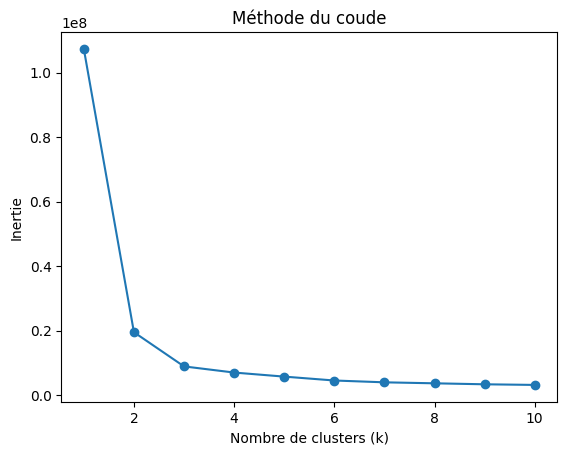

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(newdata)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

In [18]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(newdata)

newdata['cluster'] = kmeans.labels_
print(newdata.head())

   Tg(K)  Tx(K)  Tl(K)  Dmax (mm)   Zr    W    Ca    Y   Nb    S  ...   Ce  \
0  413.0  432.0  803.0        2.5  0.0  0.0  30.8  0.0  0.0  0.0  ...  0.0   
1  394.0  426.0  805.0        0.5  0.0  0.0  30.8  0.0  0.0  0.0  ...  0.0   
2  384.0  416.0  854.0        2.0  0.0  0.0  30.8  0.0  0.0  0.0  ...  0.0   
3  405.0  436.0  842.0        0.5  0.0  0.0  15.4  0.0  0.0  0.0  ...  0.0   
4  399.0  426.0  765.0        0.7  0.0  0.0  30.7  0.0  0.0  0.0  ...  0.0   

    Tb   Al    Cu   Tm   Fe    Ag   Ta   Ga  cluster  
0  0.0  0.0  15.4  0.0  0.0  30.8  0.0  0.0        1  
1  0.0  0.0   0.0  0.0  0.0  38.4  0.0  0.0        1  
2  0.0  0.0   7.7  0.0  0.0  38.5  0.0  0.0        1  
3  0.0  0.0   7.7  0.0  0.0  38.5  0.0  0.0        1  
4  0.0  0.0   0.0  0.0  0.0  46.2  0.0  0.0        1  

[5 rows x 50 columns]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


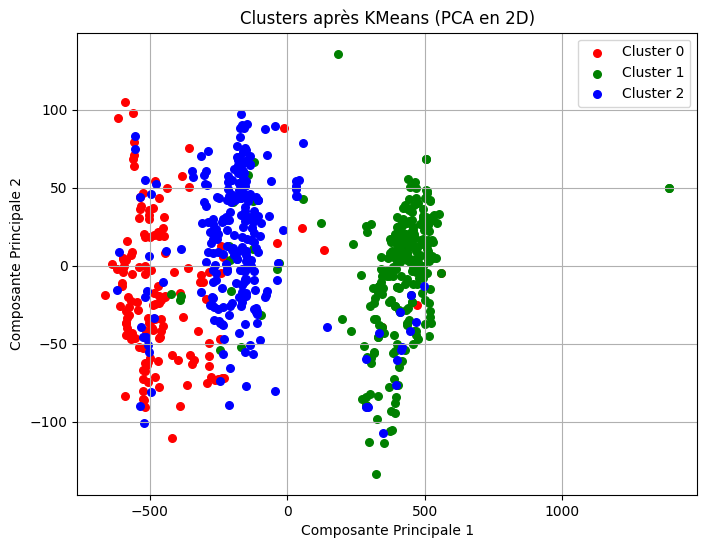

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(newdata.drop('cluster', axis=1))

plot_data = pd.DataFrame()
plot_data['PC1'] = reduced_data[:, 0]
plot_data['PC2'] = reduced_data[:, 1]
plot_data['Cluster'] = newdata['cluster']

# Tracer les clusters
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for cluster_id in range(k):
    subset = plot_data[plot_data['Cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], 
                color=colors[cluster_id], label=f'Cluster {cluster_id}', s=30)

plt.title('Clusters après KMeans (PCA en 2D)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
newdata.to_excel("/Users/chawkibhd/Downloads/projetDM/output2.xlsx", index=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


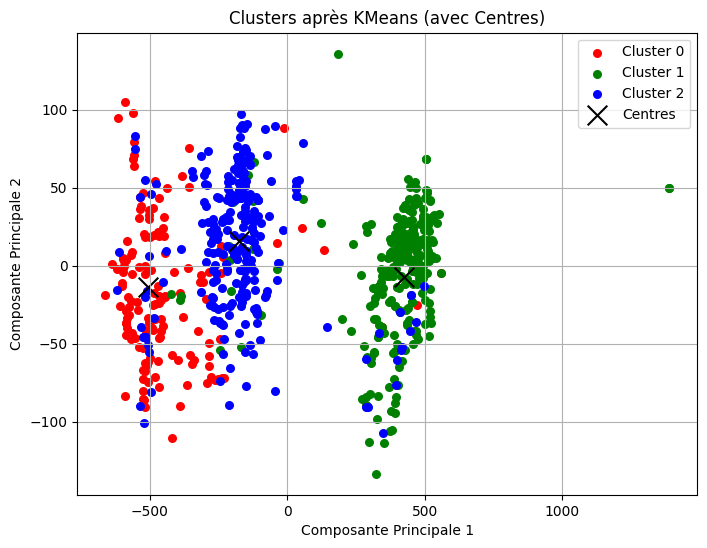

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Réduction à 2 dimensions pour affichage
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(newdata.drop('cluster', axis=1))

# 2. Transformation aussi des centres des clusters pour les afficher !
centroids_reduced = pca.transform(kmeans.cluster_centers_)

# 3. Création d'un DataFrame pour faciliter le plot
import pandas as pd
plot_data = pd.DataFrame()
plot_data['PC1'] = reduced_data[:, 0]
plot_data['PC2'] = reduced_data[:, 1]
plot_data['Cluster'] = newdata['cluster']

# 4. Tracer les clusters
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for cluster_id in range(k):
    subset = plot_data[plot_data['Cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], 
                color=colors[cluster_id], label=f'Cluster {cluster_id}', s=30)

# 5. Tracer les centres des clusters avec une croix noire
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], 
            marker='x', s=200, c='black', label='Centres')

plt.title('Clusters après KMeans (avec Centres)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
newdata_scaled = scaler.fit_transform(newdata.drop('cluster', axis=1))

In [26]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(newdata_scaled)

newdata['cluster'] = kmeans.labels_

print(newdata.head())


   Tg(K)  Tx(K)  Tl(K)  Dmax (mm)   Zr    W    Ca    Y   Nb    S  ...   Ce  \
0  413.0  432.0  803.0        2.5  0.0  0.0  30.8  0.0  0.0  0.0  ...  0.0   
1  394.0  426.0  805.0        0.5  0.0  0.0  30.8  0.0  0.0  0.0  ...  0.0   
2  384.0  416.0  854.0        2.0  0.0  0.0  30.8  0.0  0.0  0.0  ...  0.0   
3  405.0  436.0  842.0        0.5  0.0  0.0  15.4  0.0  0.0  0.0  ...  0.0   
4  399.0  426.0  765.0        0.7  0.0  0.0  30.7  0.0  0.0  0.0  ...  0.0   

    Tb   Al    Cu   Tm   Fe    Ag   Ta   Ga  cluster  
0  0.0  0.0  15.4  0.0  0.0  30.8  0.0  0.0        1  
1  0.0  0.0   0.0  0.0  0.0  38.4  0.0  0.0        1  
2  0.0  0.0   7.7  0.0  0.0  38.5  0.0  0.0        1  
3  0.0  0.0   7.7  0.0  0.0  38.5  0.0  0.0        1  
4  0.0  0.0   0.0  0.0  0.0  46.2  0.0  0.0        1  

[5 rows x 50 columns]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


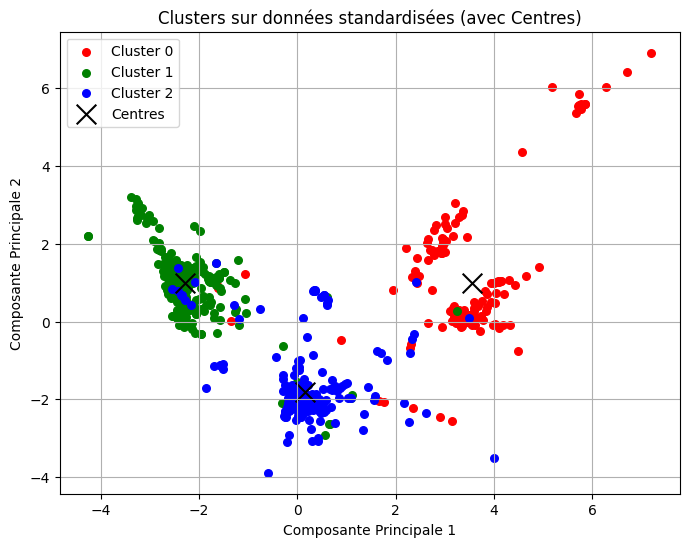

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Faire un PCA sur les données normalisées
pca = PCA(n_components=2)
reduced_scaled_data = pca.fit_transform(newdata_scaled)

# 2. Construire un DataFrame pour le scatter plot
import pandas as pd
plot_data_scaled = pd.DataFrame()
plot_data_scaled['PC1'] = reduced_scaled_data[:, 0]
plot_data_scaled['PC2'] = reduced_scaled_data[:, 1]
plot_data_scaled['Cluster'] = newdata['cluster']  # cluster est ajouté dans newdata

# 3. Tracer les clusters
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for cluster_id in range(k):
    subset = plot_data_scaled[plot_data_scaled['Cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], 
                color=colors[cluster_id], label=f'Cluster {cluster_id}', s=30)

# 4. Centres (centroïdes) dans l'espace réduit
centroids_reduced = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], 
            marker='x', s=200, c='black', label='Centres')

plt.title('Clusters sur données standardisées (avec Centres)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()
plt.grid(True)
plt.show()
